<a href="https://colab.research.google.com/github/manmeet3591/python_class/blob/master/xarray_tutorial/cape_cin_dewpoint_xarray_metpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#!pip install condacolab
import condacolab
condacolab.install()
condacolab.install_anaconda()
import numpy as np
import xarray as xr
#!conda install --yes -c conda-forge cartopy
#!pip install metpy
# Any import of metpy will activate the accessors
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units

✨🍰✨ Everything looks OK!
✨🍰✨ Everything looks OK!


In [10]:
# Open the netCDF file as a xarray Dataset
data = xr.open_dataset(get_test_data('irma_gfs_example.nc', False))

# View a summary of the Dataset
data

<xarray.Dataset>
Dimensions:                              (isobaric1: 21, isobaric3: 31, latitude: 81, longitude: 131, time1: 9)
Coordinates:
  * time1                                (time1) datetime64[ns] 2017-09-05T12...
    reftime                              datetime64[ns] ...
  * latitude                             (latitude) float32 50.0 49.5 ... 10.0
  * isobaric3                            (isobaric3) float64 100.0 ... 1e+05
  * isobaric1                            (isobaric1) float64 1e+04 ... 1e+05
  * longitude                            (longitude) float32 250.0 ... 315.0
Data variables:
    Vertical_velocity_pressure_isobaric  (time1, isobaric1, latitude, longitude) float32 ...
    Relative_humidity_isobaric           (time1, isobaric3, latitude, longitude) float32 ...
    Temperature_isobaric                 (time1, isobaric3, latitude, longitude) float32 ...
    u-component_of_wind_isobaric         (time1, isobaric3, latitude, longitude) float32 ...
    v-component_of_wind_isobaric         (time1, isobaric3, latitude, longitude) float32 ...
    Geopotential_height_isobaric         (time1, isobaric3, latitude, longitude) float32 ...
    LatLon_361X720-0p25S-180p00E         int32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

In [11]:
data.isobaric3

<xarray.DataArray 'isobaric3' (isobaric3: 31)>
array([   100.,    200.,    300.,    500.,    700.,   1000.,   2000.,   3000.,
         5000.,   7000.,  10000.,  15000.,  20000.,  25000.,  30000.,  35000.,
        40000.,  45000.,  50000.,  55000.,  60000.,  65000.,  70000.,  75000.,
        80000.,  85000.,  90000.,  92500.,  95000.,  97500., 100000.])
Coordinates:
    reftime    datetime64[ns] 2017-09-05T12:00:00
  * isobaric3  (isobaric3) float64 100.0 200.0 300.0 ... 9.5e+04 9.75e+04 1e+05
Attributes:
    units:     Pa
    positive:  down

In [12]:
temperature = data['Temperature_isobaric']
temperature

<xarray.DataArray 'Temperature_isobaric' (time1: 9, isobaric3: 31, latitude: 81, longitude: 131)>
[2960469 values with dtype=float32]
Coordinates:
  * time1      (time1) datetime64[ns] 2017-09-05T12:00:00 ... 2017-09-06T12:0...
    reftime    datetime64[ns] 2017-09-05T12:00:00
  * latitude   (latitude) float32 50.0 49.5 49.0 48.5 ... 11.5 11.0 10.5 10.0
  * isobaric3  (isobaric3) float64 100.0 200.0 300.0 ... 9.5e+04 9.75e+04 1e+05
  * longitude  (longitude) float32 250.0 250.5 251.0 251.5 ... 314.0 314.5 315.0
Attributes:
    long_name:                      Temperature @ Isobaric surface
    units:                          K
    Grib_Variable_Id:               VAR_0-0-0_L100
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               100
    Grib2_Level_Desc:               Isobaric surface
    Grib2_Generating_Process_Type:  Forecast
    grid_mapping:                   LatLon_361X720-0p25S-180p00E

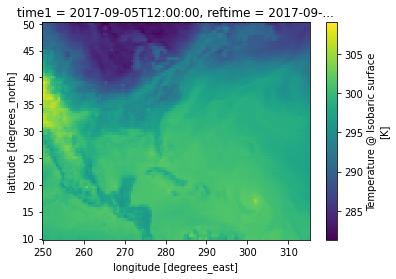

In [13]:
temperature.isel(time1=0).isel(isobaric3=-1).plot()

In [14]:
temperature.metpy.time

<xarray.DataArray 'time1' (time1: 9)>
array(['2017-09-05T12:00:00.000000000', '2017-09-05T15:00:00.000000000',
       '2017-09-05T18:00:00.000000000', '2017-09-05T21:00:00.000000000',
       '2017-09-06T00:00:00.000000000', '2017-09-06T03:00:00.000000000',
       '2017-09-06T06:00:00.000000000', '2017-09-06T09:00:00.000000000',
       '2017-09-06T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time1    (time1) datetime64[ns] 2017-09-05T12:00:00 ... 2017-09-06T12:00:00
    reftime  datetime64[ns] 2017-09-05T12:00:00
Attributes:
    standard_name:  time
    long_name:      time
    udunits:        Hour since 2017-09-05T12:00:00Z
    _metpy_axis:    time

In [15]:
x, y = temperature.metpy.coordinates('x', 'y')

In [16]:
heights = data['Geopotential_height_isobaric'].metpy.sel(
    time='2017-09-05 18:00',
    vertical=50000.
)

In [18]:
# Parse full dataset
data_parsed = data.metpy.parse_cf()

# Parse subset of dataset
data_subset = data.metpy.parse_cf([
    'u-component_of_wind_isobaric',
    'v-component_of_wind_isobaric',
    'Vertical_velocity_pressure_isobaric'
])

# Parse single variable
relative_humidity = data.metpy.parse_cf('Relative_humidity_isobaric')

In [19]:
temperature = data['Temperature_isobaric'].metpy.assign_crs(
    grid_mapping_name='latitude_longitude',
    earth_radius=6371229.0
)

temperature

<xarray.DataArray 'Temperature_isobaric' (time1: 9, isobaric3: 31, latitude: 81, longitude: 131)>
[2960469 values with dtype=float32]
Coordinates:
  * time1      (time1) datetime64[ns] 2017-09-05T12:00:00 ... 2017-09-06T12:0...
    reftime    datetime64[ns] 2017-09-05T12:00:00
  * latitude   (latitude) float32 50.0 49.5 49.0 48.5 ... 11.5 11.0 10.5 10.0
  * isobaric3  (isobaric3) float64 100.0 200.0 300.0 ... 9.5e+04 9.75e+04 1e+05
  * longitude  (longitude) float32 250.0 250.5 251.0 251.5 ... 314.0 314.5 315.0
    metpy_crs  object Projection: latitude_longitude
Attributes:
    long_name:                      Temperature @ Isobaric surface
    units:                          K
    Grib_Variable_Id:               VAR_0-0-0_L100
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               100
    Grib2_Level_Desc:               Isobaric surface
    Grib2_Generating_Process_Type:  Forecast
    grid_mapping:                   LatLon_361X720-0p25S-180p00E

In [20]:
# Cartopy CRS, useful for plotting
relative_humidity.metpy.cartopy_crs

/usr/local/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


In [21]:
# pyproj CRS, useful for projection transformations and forward/backward azimuth and great
# circle calculations
temperature.metpy.pyproj_crs

<Geographic 2D CRS: {"$schema": "https://proj.org/schemas/v0.2/projjso ...>
Name: undefined
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: undefined
- Ellipsoid: undefined
- Prime Meridian: Greenwich

In [22]:
heights = heights.metpy.quantify()
heights

Magnitude,[[5883.3564453125 5879.31640625 5875.3564453125 ... 5769.396484375 5769.99609375 5770.43603515625] [5885.47607421875 5882.236328125 5877.67626953125 ... 5783.916015625 5784.51611328125 5785.1962890625] [5888.87646484375 5885.15625 5880.916015625 ... 5798.47607421875 5799.076171875 5799.71630859375] ... [5892.51611328125 5892.236328125 5891.99609375 ... 5881.55615234375 5881.43603515625 5880.59619140625] [5891.83642578125 5891.59619140625 5891.71630859375 ... 5880.2763671875 5880.3564453125 5879.916015625] [5891.3564453125 5891.59619140625 5891.3564453125 ... 5879.87646484375 5879.59619140625 5878.99609375]]
Units,meter


In [23]:
heights_mean = heights.mean('longitude')
heights_mean

Magnitude,[5636.3671875 5644.39208984375 5652.7705078125 5661.369140625 5669.81298828125 5678.50830078125 5687.43310546875 5696.51708984375 5705.9267578125 5715.6123046875 5725.7021484375 5736.138671875 5746.8837890625 5757.7177734375 5768.56591796875 5779.28125 5789.8193359375 5799.80078125 5809.501953125 5818.771484375 5827.7744140625 5836.9208984375 5846.3857421875 5855.66796875 5864.23974609375 5871.80419921875 5878.76904296875 5885.05810546875 5890.12890625 5894.029296875 5897.14599609375 5899.6328125 5901.673828125 5903.27734375 5904.41015625 5905.27001953125 5905.89697265625 5906.591796875 5907.00830078125 5907.08056640625 5907.03076171875 5906.87109375 5906.77685546875 5906.45556640625 5906.12109375 5905.7978515625 5905.6826171875 5905.5986328125 5905.40966796875 5905.12451171875 5904.77294921875 5904.43017578125 5903.9541015625 5903.3779296875 5902.5322265625 5901.7138671875 5900.865234375 5900.09326171875 5899.3359375 5898.46728515625 5897.43994140625 5896.23291015625 5895.05712890625 5893.6328125 5891.5322265625 5888.14990234375 5883.09423828125 5884.80224609375 5887.9228515625 5889.00537109375 5889.11376953125 5888.888671875 5888.68505859375 5888.14599609375 5887.56689453125 5887.03173828125 5886.298828125 5885.42138671875 5884.51513671875 5883.69384765625 5883.07177734375]
Units,meter


In [24]:
heights_mean_str_units = heights_mean.metpy.dequantify()
heights_mean_str_units

<xarray.DataArray 'Geopotential_height_isobaric' (latitude: 81)>
array([5636.367 , 5644.392 , 5652.7705, 5661.369 , 5669.813 , 5678.5083,
       5687.433 , 5696.517 , 5705.927 , 5715.6123, 5725.702 , 5736.1387,
       5746.884 , 5757.718 , 5768.566 , 5779.2812, 5789.8193, 5799.801 ,
       5809.502 , 5818.7715, 5827.7744, 5836.921 , 5846.3857, 5855.668 ,
       5864.2397, 5871.804 , 5878.769 , 5885.058 , 5890.129 , 5894.0293,
       5897.146 , 5899.633 , 5901.674 , 5903.2773, 5904.41  , 5905.27  ,
       5905.897 , 5906.592 , 5907.0083, 5907.0806, 5907.031 , 5906.871 ,
       5906.777 , 5906.4556, 5906.121 , 5905.798 , 5905.6826, 5905.5986,
       5905.4097, 5905.1245, 5904.773 , 5904.43  , 5903.954 , 5903.378 ,
       5902.532 , 5901.714 , 5900.865 , 5900.0933, 5899.336 , 5898.4673,
       5897.44  , 5896.233 , 5895.057 , 5893.633 , 5891.532 , 5888.15  ,
       5883.094 , 5884.8022, 5887.923 , 5889.0054, 5889.114 , 5888.8887,
       5888.685 , 5888.146 , 5887.567 , 5887.0317, 5886.299 , 5885.4214,
       5884.515 , 5883.694 , 5883.072 ], dtype=float32)
Coordinates:
    time1      datetime64[ns] 2017-09-05T18:00:00
    reftime    datetime64[ns] 2017-09-05T12:00:00
  * latitude   (latitude) float32 50.0 49.5 49.0 48.5 ... 11.5 11.0 10.5 10.0
    isobaric3  float64 5e+04
Attributes:
    units:    meter

In [25]:
heights_at_45_north = data['Geopotential_height_isobaric'].metpy.sel(
    latitude=45 * units.degrees_north,
    vertical=300 * units.hPa
)
heights_at_45_north

<xarray.DataArray 'Geopotential_height_isobaric' (time1: 9, longitude: 131)>
array([[9682.115, 9676.315, 9673.275, ..., 9608.755, 9609.035, 9609.395],
       [9683.031, 9678.352, 9675.312, ..., 9623.551, 9624.352, 9625.071],
       [9688.037, 9685.677, 9681.677, ..., 9631.757, 9632.437, 9633.157],
       ...,
       [9677.054, 9678.254, 9669.454, ..., 9656.294, 9656.054, 9655.894],
       [9665.767, 9666.247, 9658.087, ..., 9666.047, 9665.487, 9664.887],
       [9660.616, 9659.856, 9652.017, ..., 9681.176, 9680.097, 9679.097]],
      dtype=float32)
Coordinates:
  * time1      (time1) datetime64[ns] 2017-09-05T12:00:00 ... 2017-09-06T12:0...
    reftime    datetime64[ns] 2017-09-05T12:00:00
    latitude   float32 45.0
    isobaric3  float64 3e+04
  * longitude  (longitude) float32 250.0 250.5 251.0 251.5 ... 314.0 314.5 315.0
Attributes:
    long_name:                      Geopotential height @ Isobaric surface
    units:                          gpm
    Grib_Variable_Id:               VAR_0-3-5_L100
    Grib2_Parameter:                [0 3 5]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Mass
    Grib2_Parameter_Name:           Geopotential height
    Grib2_Level_Type:               100
    Grib2_Level_Desc:               Isobaric surface
    Grib2_Generating_Process_Type:  Forecast
    grid_mapping:                   LatLon_361X720-0p25S-180p00E

In [26]:
temperature_degC = temperature[0].metpy.convert_units('degC')
temperature_degC

<xarray.DataArray 'Temperature_isobaric' (isobaric3: 31, latitude: 81, longitude: 131)>
<Quantity([[[-15.149994 -15.149994 -15.25     ... -14.949982 -14.949982 -14.850006]
  [-15.25     -15.25     -15.350006 ... -14.949982 -14.949982 -14.949982]
  [-15.350006 -15.350006 -15.350006 ... -15.049988 -15.049988 -15.049988]
  ...
  [-12.350006 -12.350006 -12.350006 ... -15.149994 -15.049988 -14.949982]
  [-12.149994 -12.149994 -12.149994 ... -15.049988 -15.049988 -14.949982]
  [-11.949982 -11.949982 -11.949982 ... -15.049988 -14.949982 -14.850006]]

 [[-16.649994 -16.649994 -16.649994 ... -17.549988 -17.549988 -17.649994]
  [-16.75     -16.75     -16.850006 ... -17.649994 -17.649994 -17.649994]
  [-16.949982 -16.949982 -16.949982 ... -17.75     -17.75     -17.75    ]
  ...
  [-14.049988 -14.049988 -14.049988 ... -12.049988 -11.75     -11.549988]
  [-13.949982 -13.949982 -13.949982 ... -12.049988 -11.75     -11.549988]
  [-13.75     -13.850006 -13.850006 ... -12.049988 -11.75     -11.549988]]

 [[-21.75     -21.75     -21.75     ... -22.649994 -22.649994 -22.649994]
  [-21.949997 -21.84999  -21.84999  ... -22.75     -22.75     -22.75    ]
  [-22.049988 -22.049988 -22.049988 ... -22.84999  -22.84999  -22.949997]
  ...
...
  ...
  [ 22.149994  22.149994  22.149994 ...  22.550018  22.649994  22.75    ]
  [ 22.050018  22.050018  21.950012 ...  22.550018  22.149994  22.350006]
  [ 21.950012  21.75      22.149994 ...  22.550018  22.450012  22.050018]]

 [[ 15.649994  15.149994  14.649994 ...  11.950012  11.850006  11.75    ]
  [ 15.149994  15.149994  15.050018 ...  11.950012  11.649994  11.450012]
  [ 15.050018  14.850006  15.050018 ...  11.850006  11.75      11.649994]
  ...
  [ 24.149994  24.25      24.149994 ...  24.649994  24.649994  24.850006]
  [ 23.950012  23.950012  23.850006 ...  24.649994  24.25      24.450012]
  [ 23.850006  23.649994  23.75     ...  24.649994  24.25      24.050018]]

 [[ 17.050018  16.550018  16.050018 ...  13.450012  13.450012  13.550018]
  [ 16.550018  16.550018  16.450012 ...  13.350006  13.050018  12.950012]
  [ 16.450012  16.25      16.450012 ...  13.050018  12.850006  12.850006]
  ...
  [ 26.350006  26.350006  26.25     ...  26.75      26.850006  26.950012]
  [ 26.050018  26.050018  25.950012 ...  26.75      26.350006  26.550018]
  [ 26.050018  25.75      25.649994 ...  26.75      26.350006  26.149994]]], 'degree_Celsius')>
Coordinates:
    time1      datetime64[ns] 2017-09-05T12:00:00
    reftime    datetime64[ns] 2017-09-05T12:00:00
  * latitude   (latitude) float32 50.0 49.5 49.0 48.5 ... 11.5 11.0 10.5 10.0
  * isobaric3  (isobaric3) float64 100.0 200.0 300.0 ... 9.5e+04 9.75e+04 1e+05
  * longitude  (longitude) float32 250.0 250.5 251.0 251.5 ... 314.0 314.5 315.0
    metpy_crs  object Projection: latitude_longitude
Attributes:
    long_name:                      Temperature @ Isobaric surface
    Grib_Variable_Id:               VAR_0-0-0_L100
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               100
    Grib2_Level_Desc:               Isobaric surface
    Grib2_Generating_Process_Type:  Forecast
    grid_mapping:                   LatLon_361X720-0p25S-180p00E

In [27]:
heights_on_hPa_levels = heights.metpy.convert_coordinate_units('isobaric3', 'hPa')
heights_on_hPa_levels['isobaric3']

<xarray.DataArray 'isobaric3' ()>
array(500.)
Coordinates:
    time1      datetime64[ns] 2017-09-05T18:00:00
    reftime    datetime64[ns] 2017-09-05T12:00:00
    isobaric3  float64 500.0
Attributes:
    units:        hPa
    positive:     down
    _metpy_axis:  vertical

In [28]:
heights_unit_array = heights.metpy.unit_array
heights_unit_array

Magnitude,[[5883.3564453125 5879.31640625 5875.3564453125 ... 5769.396484375 5769.99609375 5770.43603515625] [5885.47607421875 5882.236328125 5877.67626953125 ... 5783.916015625 5784.51611328125 5785.1962890625] [5888.87646484375 5885.15625 5880.916015625 ... 5798.47607421875 5799.076171875 5799.71630859375] ... [5892.51611328125 5892.236328125 5891.99609375 ... 5881.55615234375 5881.43603515625 5880.59619140625] [5891.83642578125 5891.59619140625 5891.71630859375 ... 5880.2763671875 5880.3564453125 5879.916015625] [5891.3564453125 5891.59619140625 5891.3564453125 ... 5879.87646484375 5879.59619140625 5878.99609375]]
Units,meter


In [29]:
height_units = heights.metpy.units
height_units

meter

In [30]:
heights = data_parsed.metpy.parse_cf('Geopotential_height_isobaric').metpy.sel(
    time='2017-09-05 18:00',
    vertical=500 * units.hPa
)
u_g, v_g = mpcalc.geostrophic_wind(heights)
u_g

Magnitude,[[2.3353588579406686 4.60981877223844 2.9362541310137718 ... 22.890679520432215 22.891835829490446 23.49234566620837] [4.389668010973033 4.644000832484165 4.421119856074913 ... 23.124872038344872 23.125260332728804 23.284461030163367] [5.54483394787313 4.999466098910912 5.352351177650735 ... 22.979391208366312 22.94731074666258 22.754827976440804] ... [-3.4213423527971765 -3.296001452492959 -3.1691131336642333 ... -7.605562037088769 -6.844232124116416 -4.5648846407753245] [-3.8480188676824527 -2.1241064149587885 -2.122486196488429 ... -5.573551538876476 -6.104983197236323 -5.309455928166912] [-2.647433169930482 2.2291489311550605 -2.785160907090209 ... 0.27885615921944024 -4.182842387936929 -7.2417584269395885]]
Units,meter/second


In [32]:
data_at_point = data.metpy.sel(
    time1='2017-09-05 12:00',
    latitude=40 * units.degrees_north,
    longitude=260 * units.degrees_east
)
dewpoint = mpcalc.dewpoint_from_relative_humidity(
    data_at_point['Temperature_isobaric'],
    data_at_point['Relative_humidity_isobaric']
)
cape, cin = mpcalc.surface_based_cape_cin(
    data_at_point['isobaric3'],
    data_at_point['Temperature_isobaric'],
    dewpoint
)
cape

/usr/local/lib/python3.7/dist-packages/metpy/interpolate/one_dimension.py:147: UserWarning: Interpolation point out of data bounds encountered
  warnings.warn('Interpolation point out of data bounds encountered')


0 joule/kilogram

In [35]:
dewpoint

Magnitude,[-99.82935333251953 -96.05952453613281 -92.3353500366211 -88.63002014160156 -87.07465362548828 -85.15522003173828 -80.00672912597656 -78.03092956542969 -77.61473083496094 -75.08856964111328 -79.37686920166016 -70.56153869628906 -58.95000076293945 -51.3762321472168 -46.68995666503906 -37.5723876953125 -32.04010009765625 -29.61290740966797 -28.455291748046875 -19.897642135620117 -10.62380313873291 -5.3596601486206055 -3.675081729888916 -7.891808986663818 -7.553308486938477 -5.418003559112549 -3.973980188369751 -2.867135524749756 -1.6815516948699951 -0.4410230219364166 0.7987133264541626]
Units,degree_Celsius


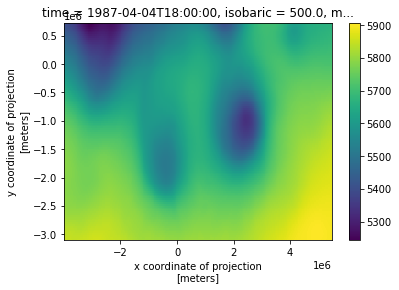

In [36]:
# Load data, parse it for a CF grid mapping, and promote lat/lon data variables to coordinates
data = xr.open_dataset(
    get_test_data('narr_example.nc', False)
).metpy.parse_cf().set_coords(['lat', 'lon'])

# Subset to only the data you need to save on memory usage
subset = data.metpy.sel(isobaric=500 * units.hPa)

# Quantify if you plan on performing xarray operations that need to maintain unit correctness
subset = subset.metpy.quantify()

# Perform calculations
heights = mpcalc.smooth_gaussian(subset['Geopotential_height'], 5)
subset['u_geo'], subset['v_geo'] = mpcalc.geostrophic_wind(heights)

# Plot
heights.plot()